<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Titanic_II.jpg/1200px-Titanic_II.jpg" width=500>


## Kaggle URL

* https://www.kaggle.com/competitions/titanic


## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터셋 로드

In [2]:
import glob
glob.glob('data/titanic/*')

['data/titanic/submit.csv',
 'data/titanic/test.csv',
 'data/titanic/train.csv',
 'data/titanic/gender_submission.csv',
 'data/titanic/submit2.csv']

In [3]:
train = pd.read_csv('data/titanic/train.csv')
train.shape

(891, 12)

In [4]:
test = pd.read_csv('data/titanic/test.csv')
test.shape

(418, 11)

In [5]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


## info

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## histogram

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

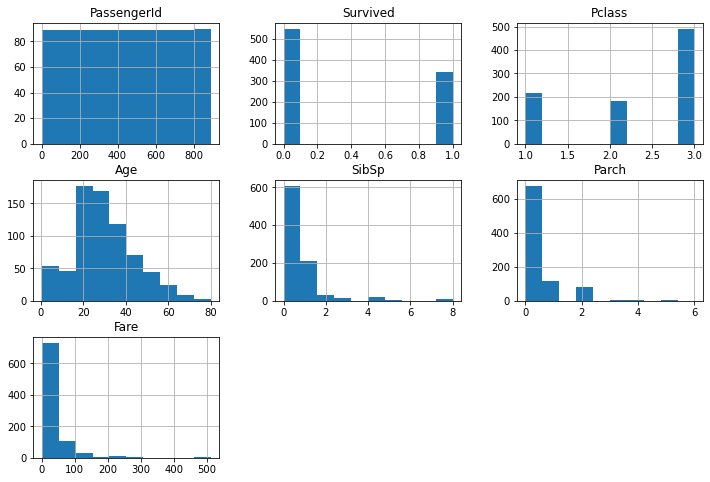

In [8]:
train.hist(figsize = (12, 8))

## 결측치

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 정답값 빈도수

In [10]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
train['Survived'].value_counts(normalize = True) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

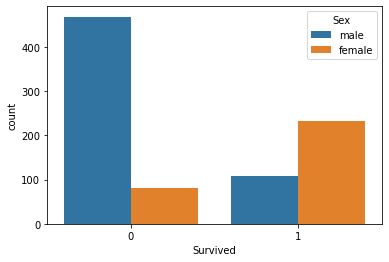

In [12]:
sns.countplot(data = train, x = 'Survived', hue = 'Sex')

In [13]:
test['Sex']  == 'female'

0      False
1       True
2      False
3      False
4       True
       ...  
413    False
414     True
415    False
416    False
417    False
Name: Sex, Length: 418, dtype: bool

## 제출하기

In [14]:
df_submit = pd.read_csv('data/titanic/gender_submission.csv')
df_submit.shape

(418, 2)

In [15]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [16]:
df_submit['Survived'] = (test['Sex'] == 'female').astype(int)
df_submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [17]:
df_submit.to_csv('data/titanic/submit.csv', index = False)

In [18]:
pd.read_csv('data/titanic/submit.csv')  # 75% 정도 나옴
# 정확성을 더 기를 생각은???
# 가족인원?
# 성별?
# Pclass?

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
